In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Food CPI_Items(1995-2022)_monthly.csv')
df.head()

,Time,All Items (weight = 1000.00),All Items less Farm Produce (weight = 513.10),All Items less Farm Produce and Energy (weight = 405.55),Imported Food (weight = 132.88),Food (weight = 507.06),Food & Non Alcoholic Bev (weight = 518.00),"Alcoholic Beverage, Tobacco and Kola (weight = 10.87)",Clothing and Footwear (weight = 76.50),"Housing Water, Electricity, Gas and Other Fuel (weight = 167.34)",Furnishings & Household Equipment Maintenance (weight = 50.30),Health (weight = 30.04),Transport (weight = 65.08),Communication (weight = 6.80),Recreation & Culture (weight = 6.87),Education (weight = 39.44),Restaurant & Hotels (weight = 12.12),Miscellaneous Goods & Services (weight = 16.63)
0,01/01/1995,14.36,14.75,20.56,.,15.14,14.96,20.65,29.19,7.76,31.68,28.14,16.17,.,15.65,.,.,10.14
1,02/01/1995,15.02,15.33,21.15,.,15.82,15.63,20.57,30.53,8.36,33.28,29.1,15.94,.,15.86,.,.,10.65
2,03/01/1995,15.56,15.8,21.92,.,16.37,16.17,21.6,31.57,8.6,34.69,30.55,16.83,.,16.18,.,.,10.86
3,04/01/1995,16.95,16.75,23.27,.,18.12,17.91,21.73,33.77,9.07,35.96,30.87,17.17,.,17.61,.,.,11.67
4,05/01/1995,18,17.09,23.75,.,19.54,19.28,22.48,34.26,9.21,36.95,32.21,17.65,.,17.88,.,.,12.53


In [3]:
df.columns

Index(['Time', 'All Items (weight = 1000.00)',
       'All Items less Farm Produce (weight = 513.10)',
       'All Items less Farm Produce and Energy (weight = 405.55)',
       'Imported Food (weight = 132.88)', 'Food (weight = 507.06)',
       'Food &  Non Alcoholic Bev (weight = 518.00)',
       'Alcoholic Beverage, Tobacco and Kola (weight = 10.87)',
       'Clothing and Footwear (weight = 76.50)',
       'Housing Water, Electricity, Gas and Other  Fuel (weight = 167.34)',
       'Furnishings & Household Equipment Maintenance (weight = 50.30)',
       'Health (weight = 30.04)', 'Transport (weight = 65.08)',
       'Communication (weight = 6.80)', 'Recreation & Culture (weight = 6.87)',
       'Education (weight = 39.44)', 'Restaurant & Hotels (weight = 12.12)',
       'Miscellaneous Goods & Services (weight = 16.63)'],
      dtype='object')

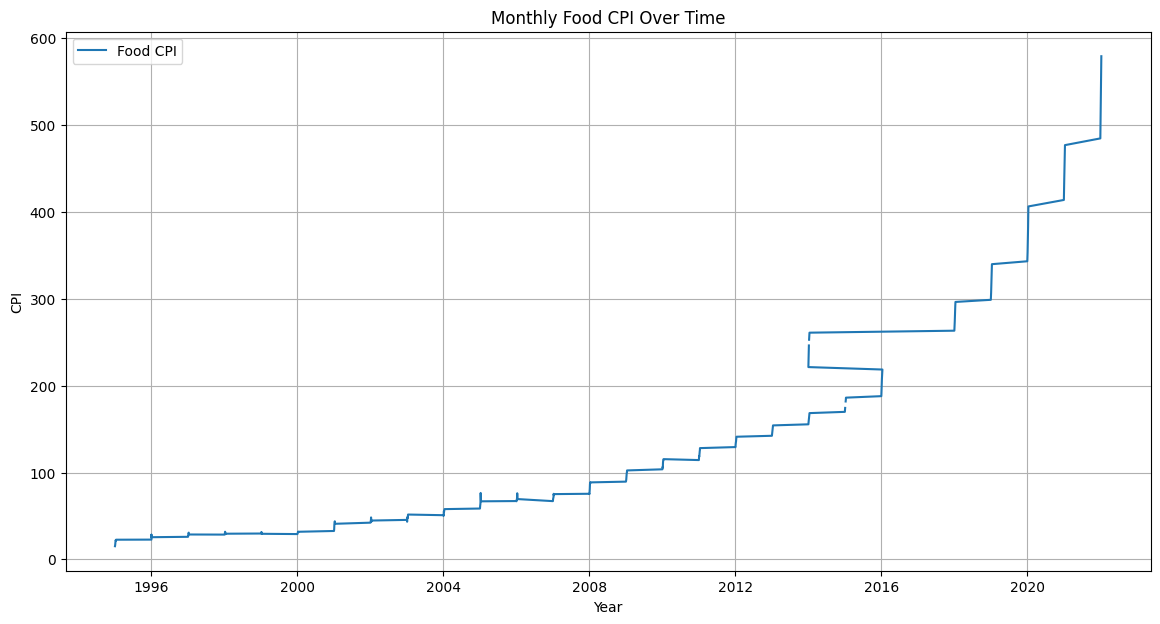

In [4]:

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y')

# Replace missing values '.' with NaN and convert columns to numeric
df.replace('.', pd.NA, inplace=True)
cols_to_numeric = df.columns[1:]
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric)

# Set 'Time' column as the index
df.set_index('Time', inplace=True)

# Plot monthly food CPI values over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Food (weight = 507.06)'], label='Food CPI')
plt.title('Monthly Food CPI Over Time')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()



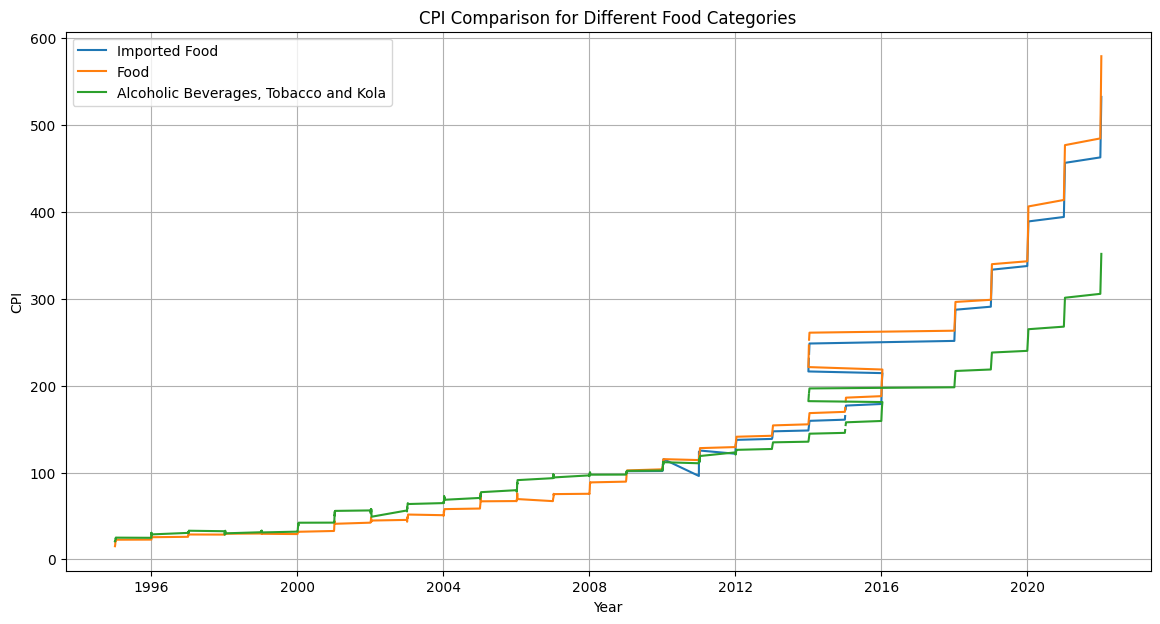

In [5]:

# Compare CPI for different food categories
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Imported Food (weight = 132.88)'], label='Imported Food')
plt.plot(df.index, df['Food (weight = 507.06)'], label='Food')
plt.plot(df.index, df['Alcoholic Beverage, Tobacco and Kola (weight = 10.87)'], label='Alcoholic Beverages, Tobacco and Kola')
plt.title('CPI Comparison for Different Food Categories')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()


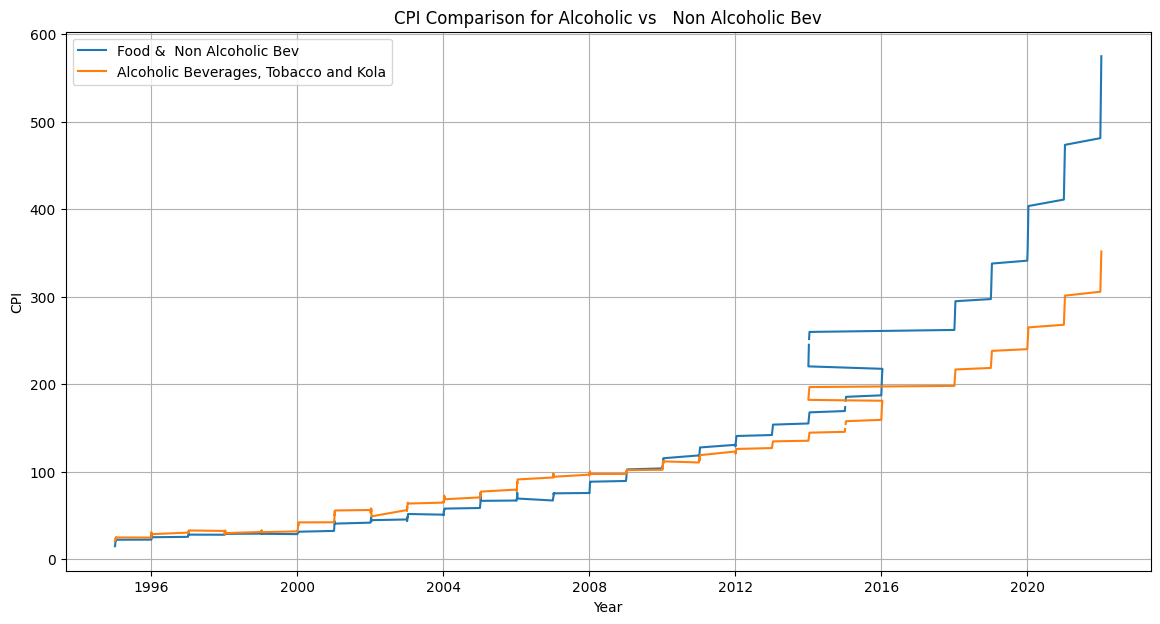

In [7]:

# Compare CPI for different food categories
plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Food &  Non Alcoholic Bev (weight = 518.00)'], label='Food &  Non Alcoholic Bev')
plt.plot(df.index, df['Alcoholic Beverage, Tobacco and Kola (weight = 10.87)'], label='Alcoholic Beverages, Tobacco and Kola')
plt.title('CPI Comparison for Alcoholic vs   Non Alcoholic Bev')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

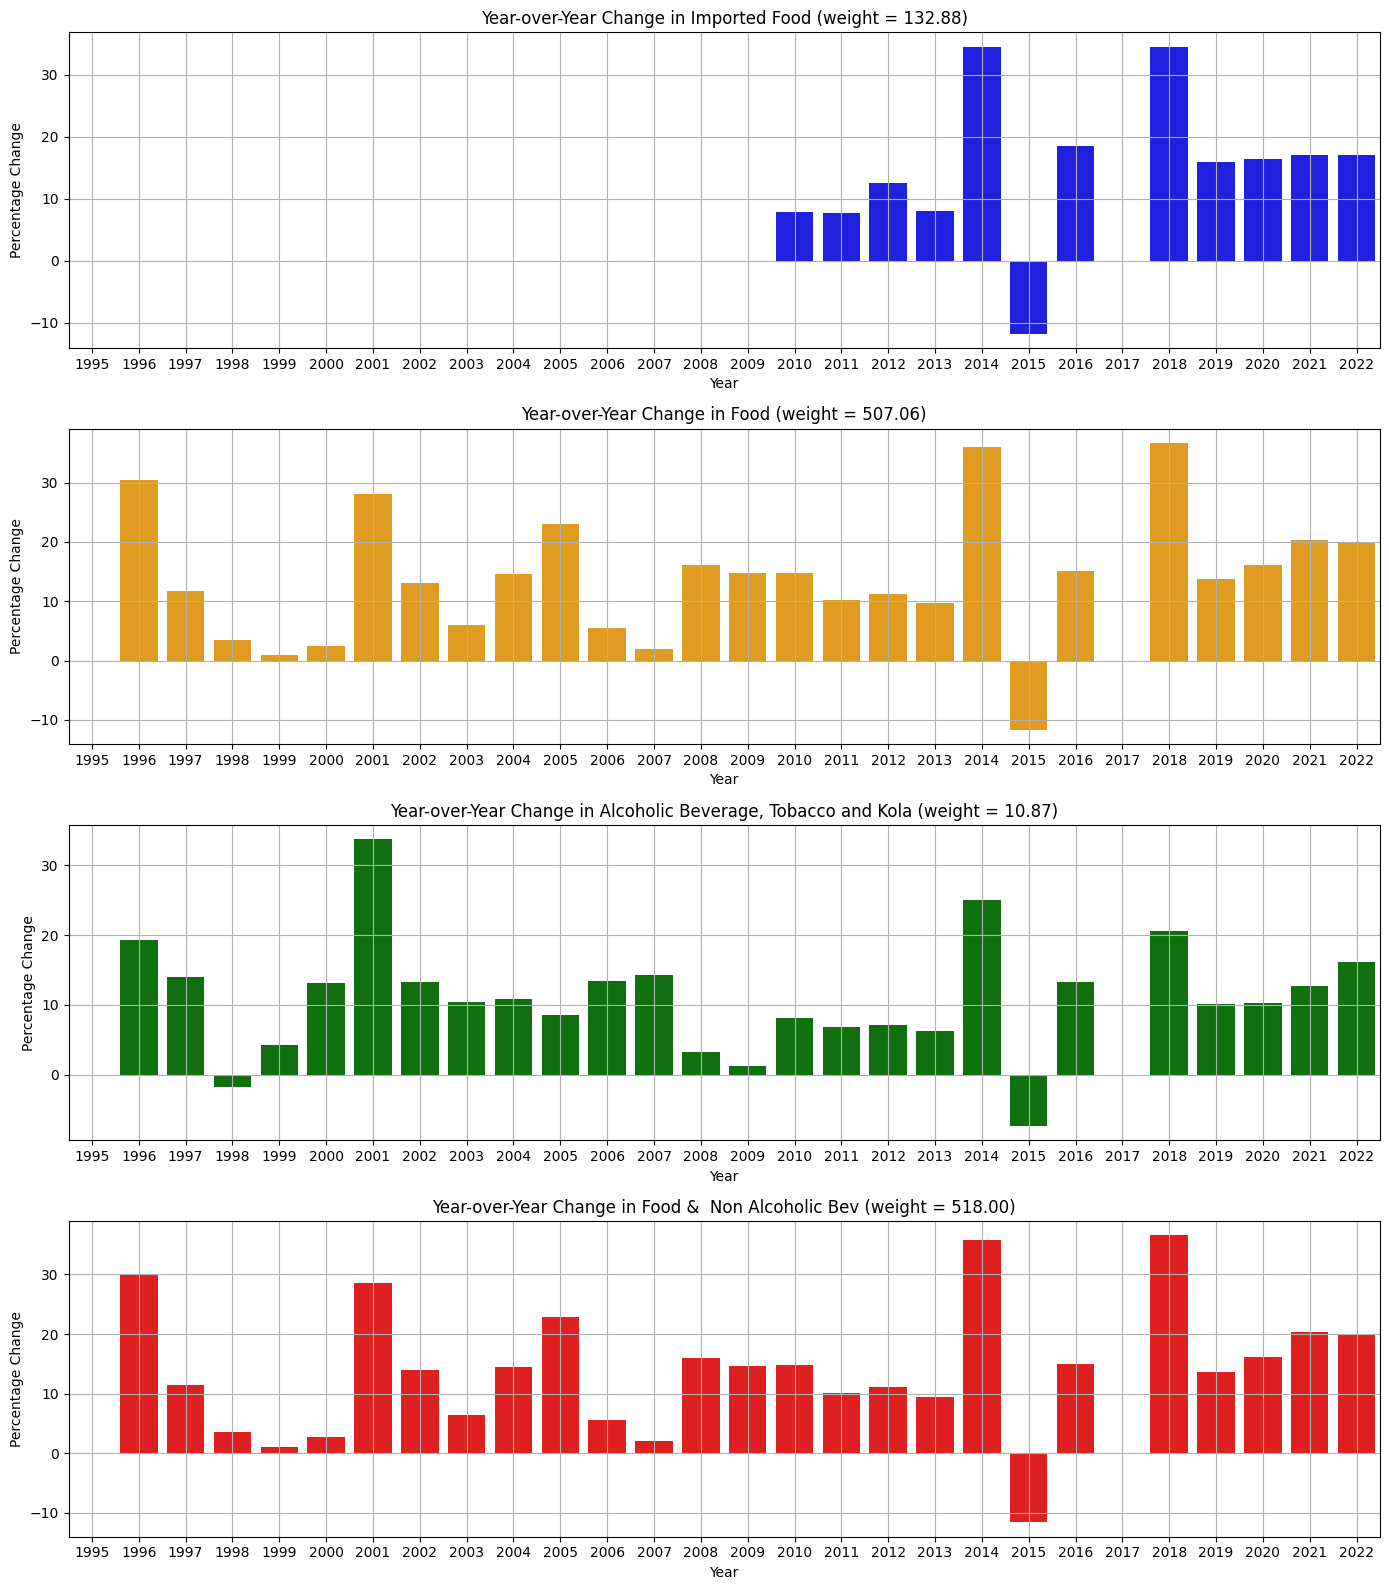

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Year-over-year change in CPI
data_yearly = df.resample('Y').mean()

# Calculate year-over-year change
yearly_change = data_yearly.pct_change() * 100

colors = ['blue', 'orange', 'green', 'red']
fig, ax = plt.subplots(4, 1, figsize=(14, 16))

# Flatten ax array if it's 2D (for compatibility with different versions of matplotlib)
if len(categories) == 1:
    ax = [ax]  # ensure ax is a list if there's only one category
else:
    ax = ax.flatten()

for i, category in enumerate(categories):
    sns.barplot(x=yearly_change.index.year, y=yearly_change[category], ax=ax[i], color=colors[i])
    ax[i].set_title(f'Year-over-Year Change in {category}')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Percentage Change')
    ax[i].grid(True)

plt.tight_layout()
plt.show()



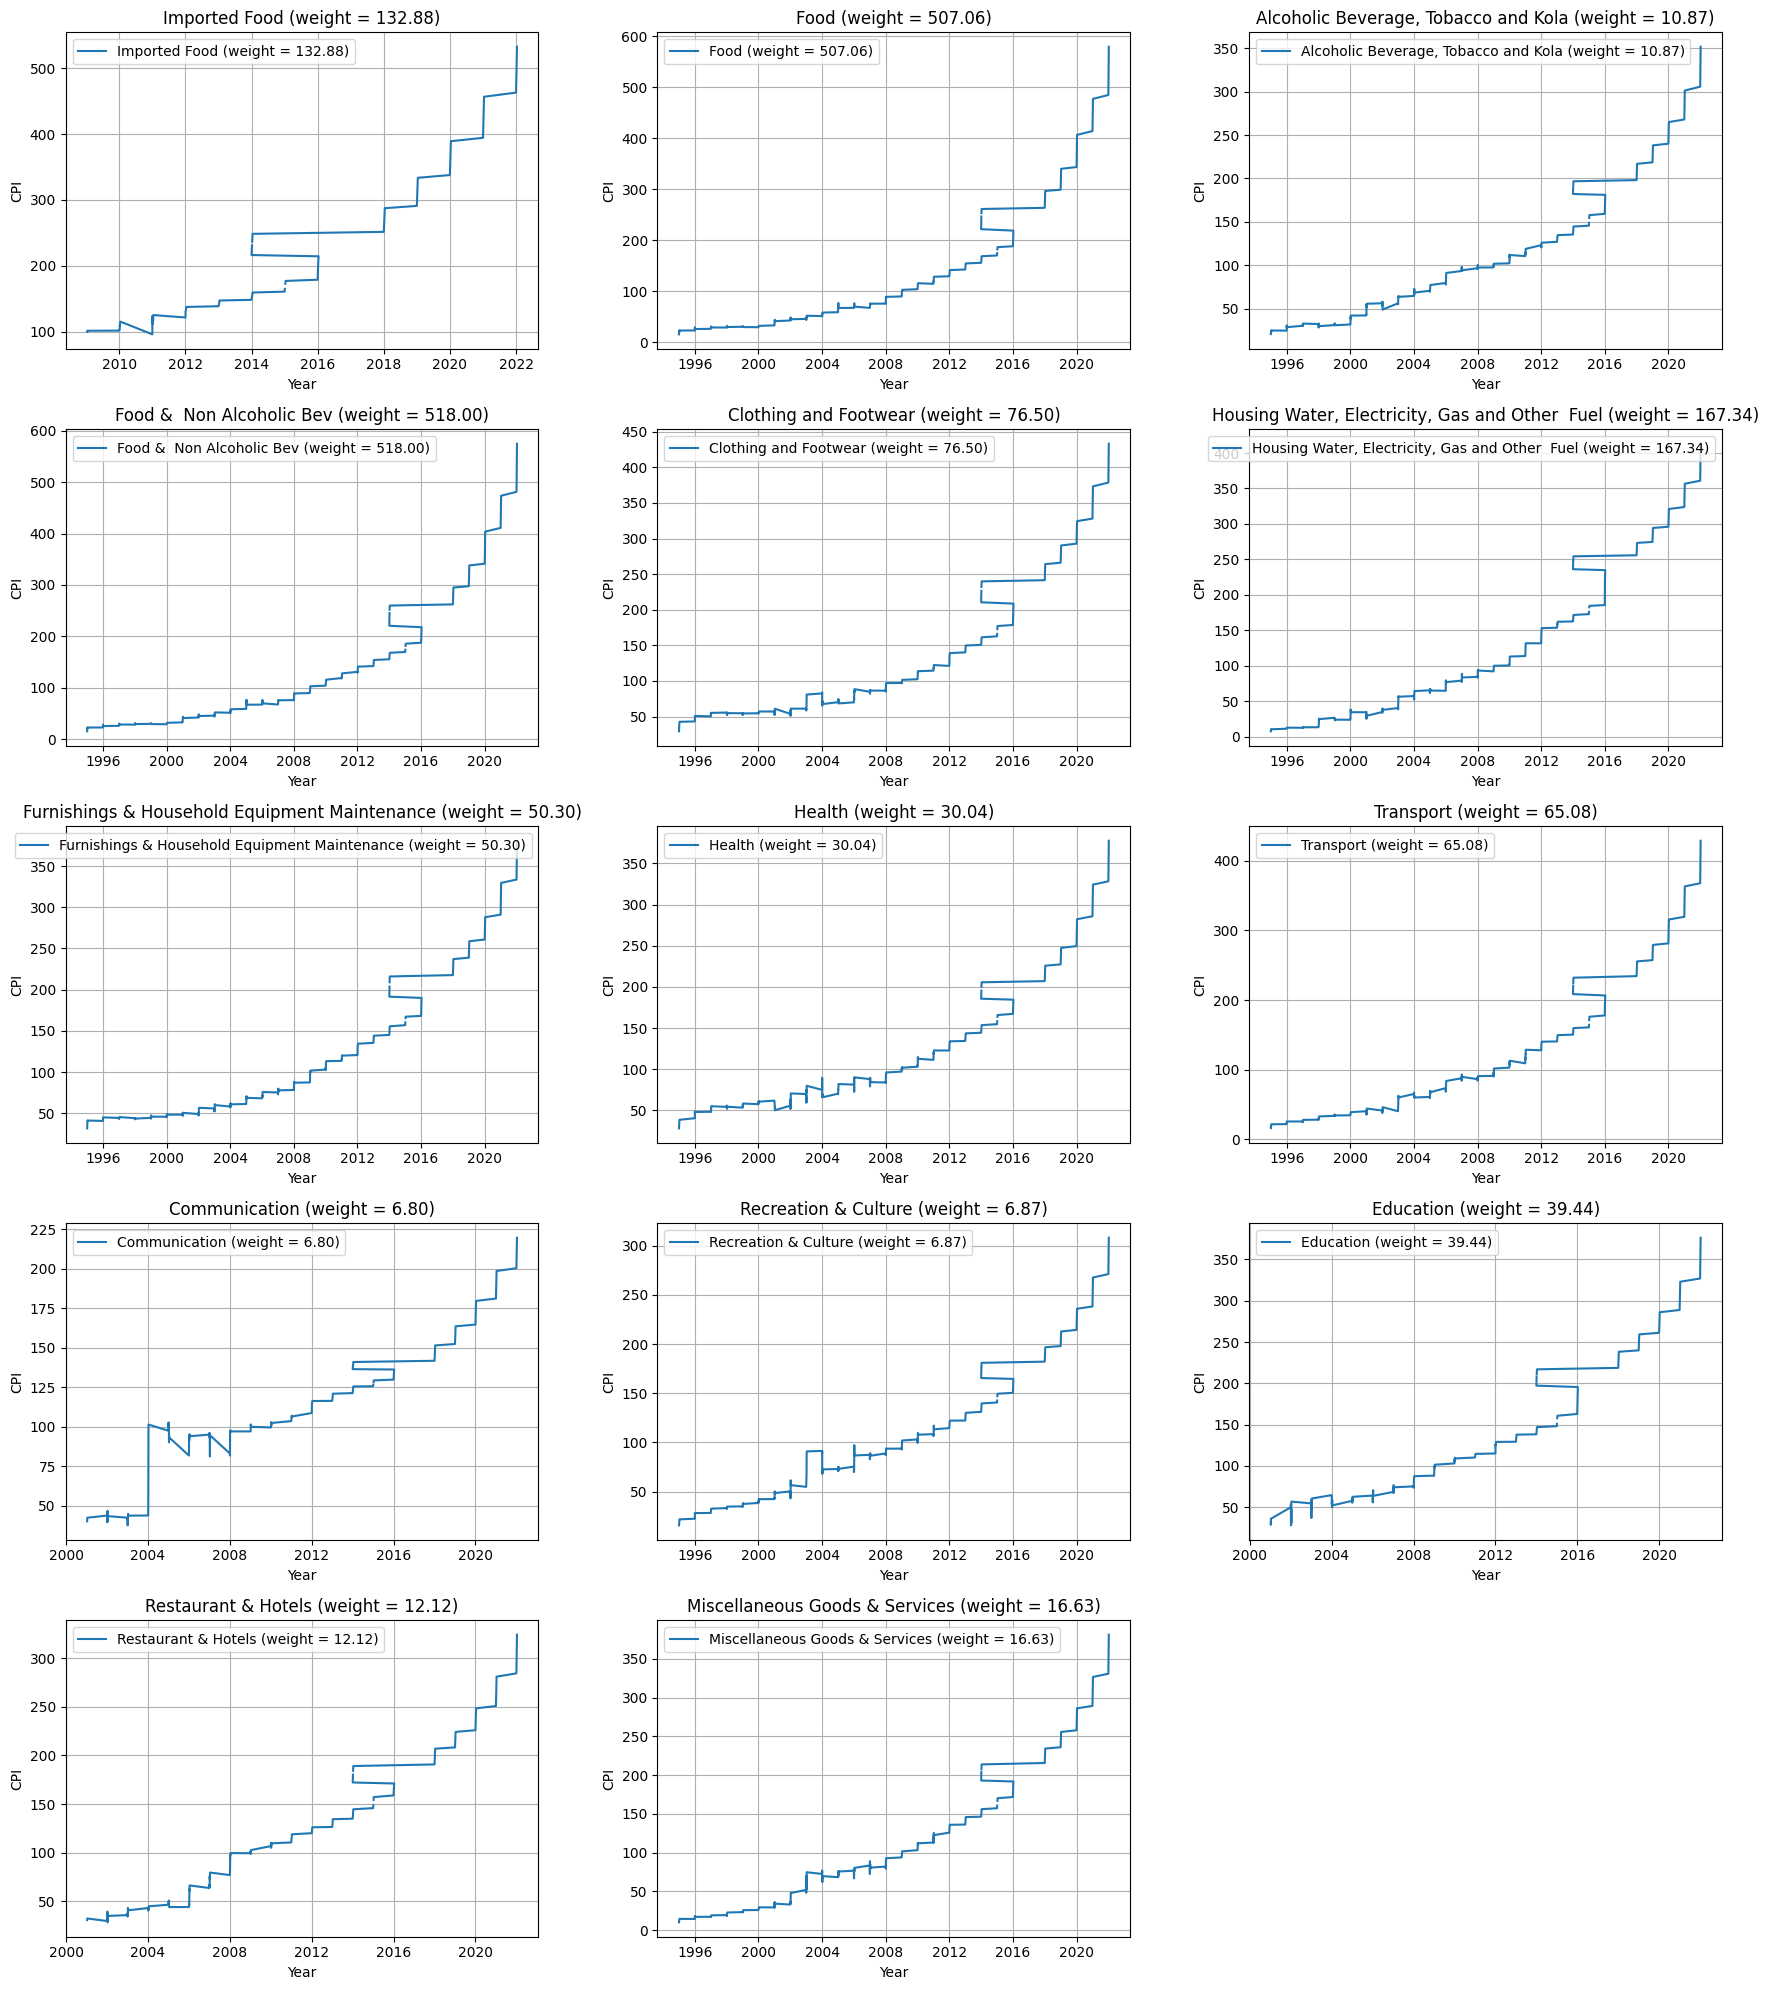

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Define the categories to plot
categories = [
    'Imported Food (weight = 132.88)',
    'Food (weight = 507.06)',
    'Alcoholic Beverage, Tobacco and Kola (weight = 10.87)',
    'Food &  Non Alcoholic Bev (weight = 518.00)',
    'Clothing and Footwear (weight = 76.50)',
    'Housing Water, Electricity, Gas and Other  Fuel (weight = 167.34)',
    'Furnishings & Household Equipment Maintenance (weight = 50.30)',
    'Health (weight = 30.04)',
    'Transport (weight = 65.08)',
    'Communication (weight = 6.80)',
    'Recreation & Culture (weight = 6.87)',
    'Education (weight = 39.44)',
    'Restaurant & Hotels (weight = 12.12)',
    'Miscellaneous Goods & Services (weight = 16.63)'
]

# Create a grid of line charts
num_categories = len(categories)
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))

for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.plot(data.index, data[category], label=category)
    ax.set_title(category)
    ax.set_xlabel('Year')
    ax.set_ylabel('CPI')
    ax.legend()
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


<ipython-input-14-953e4e0e083c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average CPI', y='Category', data=avg_cpi_df, palette='viridis')


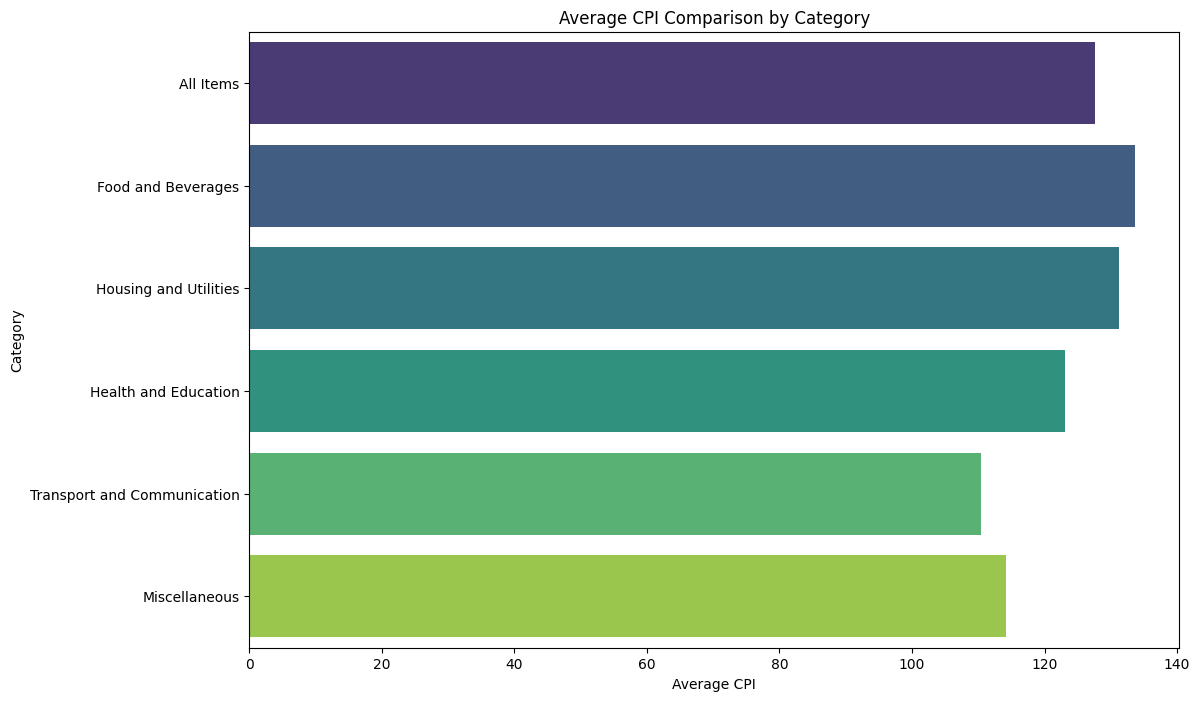

In [14]:
categories = {
    'All Items': ['All Items (weight = 1000.00)', 'All Items less Farm Produce (weight = 513.10)',
                  'All Items less Farm Produce and Energy (weight = 405.55)'],
    'Food and Beverages': ['Imported Food (weight = 132.88)', 'Food (weight = 507.06)',
                           'Food &  Non Alcoholic Bev (weight = 518.00)', 'Alcoholic Beverage, Tobacco and Kola (weight = 10.87)'],
    'Housing and Utilities': ['Clothing and Footwear (weight = 76.50)',
                              'Housing Water, Electricity, Gas and Other  Fuel (weight = 167.34)'],
    'Health and Education': ['Health (weight = 30.04)', 'Education (weight = 39.44)'],
    'Transport and Communication': ['Transport (weight = 65.08)', 'Communication (weight = 6.80)'],
    'Miscellaneous': ['Furnishings & Household Equipment Maintenance (weight = 50.30)',
                      'Recreation & Culture (weight = 6.87)', 'Restaurant & Hotels (weight = 12.12)',
                      'Miscellaneous Goods & Services (weight = 16.63)']
}

# Calculate the average CPI for each category
average_cpi = {}
for category, columns in categories.items():
    average_cpi[category] = df[columns].mean(axis=1).mean()

# Create a DataFrame for visualization
avg_cpi_df = pd.DataFrame(list(average_cpi.items()), columns=['Category', 'Average CPI'])

# Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Average CPI', y='Category', data=avg_cpi_df, palette='viridis')
plt.title('Average CPI Comparison by Category')
plt.xlabel('Average CPI')
plt.ylabel('Category')
plt.show()